<a href="https://colab.research.google.com/github/alexander-billings/food-sales-predictions/blob/master/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions Initial Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Reading data from public link to Google Drive (data is not sensative)
food_sales_df = pd.read_csv("https://raw.githubusercontent.com/alexander-billings/food-sales-predictions/master/dataset/sales_predictions.csv")

# Verifying the data loaded properly
food_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052



# Data Dictionary
| Variable Name	|Description|
|---|---|
|Item_Identifier	|Unique product ID|
|Item_Weight	|Weight of product|
|Item_Fat_Content|	Whether the product is low fat or regular|
|Item_Visibility	|The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type	|The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier	|Unique store ID|
|Outlet_Establishment_Year	|The year in which store was established|
|Outlet_Size	|The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of area in which the store is located |
|Outlet_Type	|Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted.|

# Data Cleaning

In [2]:
# Exploring the data set
print("Dataframe rows:   ", food_sales_df.shape[0])
print("Dataframe columns:", food_sales_df.shape[1], '\n')

print("Checking dataframe data types:")
print(food_sales_df.dtypes, '\n')

Dataframe rows:    8523
Dataframe columns: 12 

Checking dataframe data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 



## Cleaning Duplicate Values


In [3]:
print("Checking for duplicated rows:")
print("Found", food_sales_df.duplicated().sum(), "duplicated rows\n")

Checking for duplicated rows:
Found 0 duplicated rows



## Cleaning Null Values

In [4]:
print("Checking for null or missing values:")
food_sales_df.isna().sum()

Checking for null or missing values:


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
# Checking to see if I can fill in gaps where Outlet_Size is missing by using a row where
# it isn't for that Outlet_Identifier
food_sales_df.loc[: , ['Outlet_Identifier', 'Outlet_Size']].groupby("Outlet_Identifier").nunique(dropna=False)

,Outlet_Size
Outlet_Identifier,
OUT010,1
OUT013,1
OUT017,1
OUT018,1
OUT019,1
OUT027,1
OUT035,1
OUT045,1
OUT046,1


In a real-world scenario I would attempt to reach the subject matter experts regarding the data to fill in. Considering I'm unable to programmatically fill the values accurately, I will just mark the missing sizes with "missing_size" so I could easily fill in later if possible.

In [6]:
food_sales_df['Outlet_Size'].fillna(value='missing_size', inplace=True)
food_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Checking to see if I can fill in gaps where Item_Weight is missing by using a row where
# it isn't for that Item_Identifier
food_sales_df.loc[: , ['Item_Identifier', 'Item_Weight']].groupby("Item_Identifier").nunique(dropna=False)

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,2
DRA59,2
DRB01,2
DRB13,1
...,...
NCZ30,2
NCZ41,1
NCZ42,1


Given there are Item_Identifiers with null and non-null values, I would consider programmatically filling some of these in. In the meantime, considering some Item_Identifiers do not have weights at all, I would consider dropping the rows for now until a script can be written or a module found to use existing weights to fill missing ones.

In [8]:
food_sales_df.dropna(inplace=True)
food_sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Cleaning Category Columns

In [9]:
# Checking for inconsistent categories
print(food_sales_df['Item_Fat_Content'].unique())
print(food_sales_df['Item_Type'].unique())
print(food_sales_df['Outlet_Location_Type'].unique())
print(food_sales_df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Breads' 'Canned' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store']


Item_Fat_Content has inconsistencies. Will replace the following:

LF, low fat = Low Fat

reg = Regular

In [10]:
food_sales_df.replace(to_replace='LF', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='low fat', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='reg', value='Regular', inplace=True)

In [11]:
# Verifying replacement
print(food_sales_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


## Cleaning Numeric Columns

In [12]:
# Printing the min, max, and mean of numeric columns
def print_min_max_mean(column):
  print(column.name)
  print("Min: ", column.min())
  print("Max: ", column.max())
  print("Mean:", column.mean(), '\n')
  return

# Printing specific values I want for easier readability
print_min_max_mean(food_sales_df['Item_Weight'])
print_min_max_mean(food_sales_df['Item_Visibility'])
print_min_max_mean(food_sales_df['Item_MRP'])
print_min_max_mean(food_sales_df['Outlet_Establishment_Year'])
print_min_max_mean(food_sales_df['Item_Outlet_Sales'])

# Full dataframe description
food_sales_df.describe()

Item_Weight
Min:  4.555
Max:  21.35
Mean: 12.857645184136183 

Item_Visibility
Min:  0.0
Max:  0.311090379
Mean: 0.06396338186288959 

Item_MRP
Min:  31.49
Max:  266.8884
Mean: 141.2406832577905 

Outlet_Establishment_Year
Min:  1987
Max:  2009
Mean: 2000.4909348441927 

Item_Outlet_Sales
Min:  33.29
Max:  10256.649
Mean: 2118.626808130321 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


# Exploratory Analysis

In [13]:
print(len(food_sales_df['Item_Identifier'].unique()), 'unique item identifiers')

1555 unique item identifiers


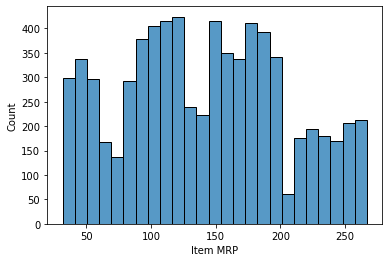

In [14]:
sns.histplot(data=food_sales_df, x='Item_MRP');
plt.xlabel('Item MRP');

<AxesSubplot:xlabel='Item_MRP'>

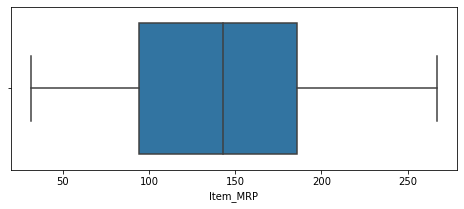

In [15]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_MRP'])

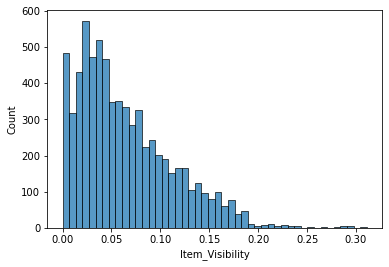

In [16]:
sns.histplot(data=food_sales_df['Item_Visibility']);

Observation: The lower the Item_Visibility metric is, the more sales are associated with it.

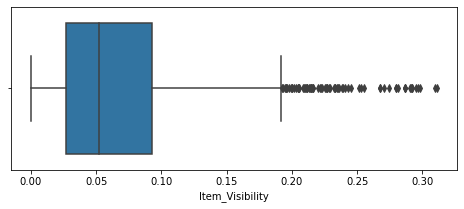

In [17]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_Visibility']);

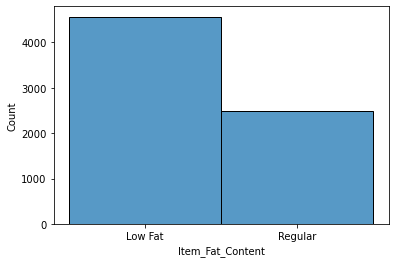

In [18]:
sns.histplot(data=food_sales_df['Item_Fat_Content']);

Observation: The majority of sales are of Low Fat items.

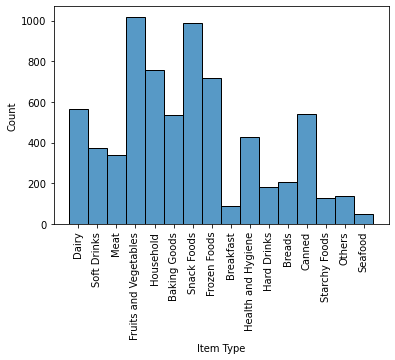

In [19]:
sns.histplot(data=food_sales_df, x='Item_Type')
plt.xlabel('Item Type')
plt.xticks(rotation=90);

Observation: It might be interesting to see a comparison of Low Fat and Regular items in Dairy or Snack Food types.

<AxesSubplot:>

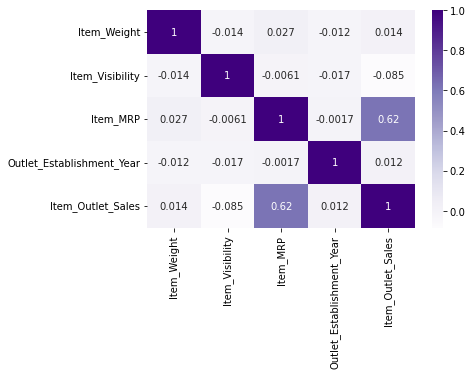

In [20]:
# First checking a heatmap to confirm some initial observations
food_sales_corr = food_sales_df.corr()
sns.heatmap(data=food_sales_corr, cmap='Purples', annot=True)


Observation: Item_MRP has a correlation to Item_Outlet_sales, might be worth exploring more

---

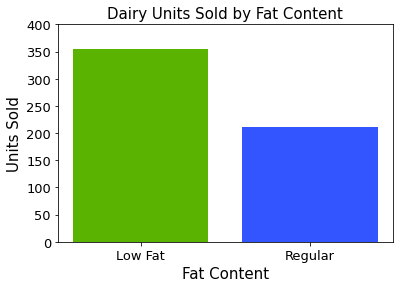

In [21]:
# Breaking down dairy sales by fat content
dairy_filter = food_sales_df['Item_Type'] == 'Dairy'
dairy_fat = food_sales_df[dairy_filter].groupby('Item_Fat_Content')['Item_Identifier'].count()

# Setting labels, title, and fontsizes
plt.title('Dairy Units Sold by Fat Content', fontsize=15)
plt.xlabel('Fat Content', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Units Sold', fontsize =15)
plt.yticks(fontsize=13)

# Giving a little extra headrom
ax = plt.gca()
ax.set_ylim([0, 400])

# Everything low-fat has green on it
colors = ['#59B300', '#3355FF']
plt.bar(data=dairy_fat, x=dairy_fat.index, height=dairy_fat.values, color=colors);

## Fat Content in Dairy Observation
* It is probably worth-while to experiment with different offerings in Dairy
* People might prefer Low Fat offerings in Dairy
* Further breakdowns of sub-categories, such as cheese or ice cream, would provide more insight

---

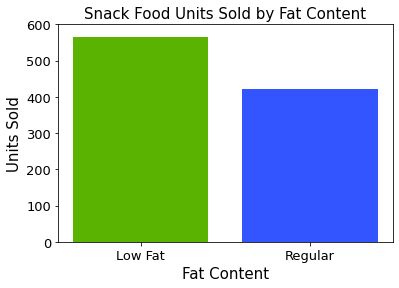

In [22]:
# Breaking down dairy sales by fat content
snack_filter = food_sales_df['Item_Type'] == 'Snack Foods'
snack_fat = food_sales_df[snack_filter].groupby('Item_Fat_Content')['Item_Identifier'].count()

# Setting labels, title, and fontsizes
plt.title('Snack Food Units Sold by Fat Content', fontsize=15)
plt.xlabel('Fat Content', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Units Sold', fontsize =15)
plt.yticks(fontsize=13)

# Giving a little extra headrom
ax = plt.gca()
ax.set_ylim([0, 600])

# Everything low-fat has green on it
colors = ['#59B300', '#3355FF']
plt.bar(data=snack_fat, x=snack_fat.index, height=snack_fat.values, color=colors);

## Fat Content in Snacks Observation
* Comparing the ratio of Low Fat Dairy and Regular Dairy to the ratio of Low Fat Snacks and Regular Snacks show there is a stronger correlation between Low Fat sales and Dairy products
* Low Fat is more popular in at least two item categories
* It might be worthwhile exploring applying similar inventory balances of "Healthfood" to "Regular food" to other categories to see if trend follows

---

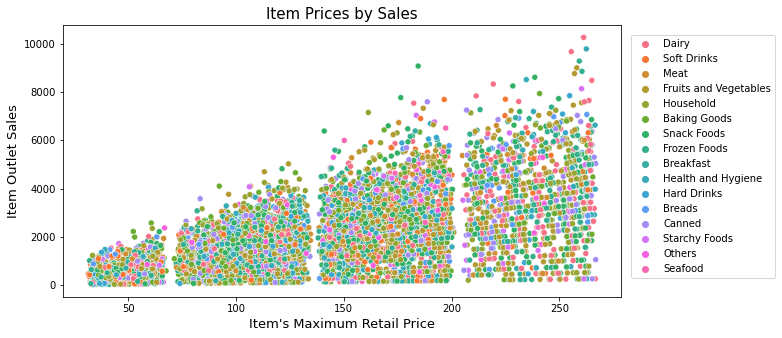

In [23]:
# Revisiting possible correlation between Item_Outlet_Sales and Item_MRP
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.xlabel('Item\'s Maximum Retail Price', fontsize=13)
plt.ylabel('Item Outlet Sales', fontsize=13)
plt.title("Item Prices by Sales", fontsize=15)
sns.scatterplot(data=food_sales_df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type')

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', borderaxespad=1)

## Item Max Retail Price Observation
* Interesting bands in pricing showing, same as in earlier analysis of Item_MRP
* It is probably worthwhile to further examine the data source to determine if the currency was converted as the bands aren't lining up to expected points (99, 149, 199, etc)

# Machine Learning

I have selected Linear Regression and a Simple Decision Tree as my machine learning models for this data set. This decision was based off of the simplicity of the data set and the ease of evaluating the models.

## Setup

In [24]:
# Importing modules that will likely be used
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Taking inventory of what might be useful 
food_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


## Features and Target
* The target will be Item_Outlet_sales as the ability to predict sales will be useful
* The identifiers will be dropped as I want to predict sales based on the item's or outlet's qualities

In [25]:
# Identifying X features and y target
X = food_sales_df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = food_sales_df['Item_Outlet_Sales']

# Plitting the training data from the testing data, random_state picked for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Pre-Processing Pipeline

In [26]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns = cat_selector(X_train)
num_columns = num_selector(X_train)

print("Category columns:", cat_columns)
print("Number columns:", num_columns)

Category columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Number columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [27]:
# Create one_hot to handle category data and scaler to help with numerical, especially the outlet year
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

scaler_tuple = (scaler, num_selector)
ohe_tuple = (one_hot_encoder, cat_selector)

column_transformer = make_column_transformer(scaler_tuple, ohe_tuple)

preprocess_pipe = make_pipeline(column_transformer)

In [28]:
# Fit on training data, then process X_train and X_test
preprocess_pipe.fit(X_train, y_train)
X_train_processed = preprocess_pipe.transform(X_train)
X_test_processed = preprocess_pipe.transform(X_test)

## Linear Regression

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

lin_train_prediction = lin_reg.predict(X_train_processed)
lin_test_prediction  = lin_reg.predict(X_test_processed)

lin_predictions = lin_train_prediction, lin_test_prediction

## Simple Tree Regression

In [44]:
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X_train_processed, y_train)

tree_train_prediction = tree.predict(X_train_processed)
tree_test_prediction  = tree.predict(X_test_processed)

tree_predictions = tree_train_prediction, tree_test_prediction

## Model Evaluation


In [35]:
# Creating scoring function
def score_model(model, model_label, predictions, truths=(y_train, y_test)):
  """Take a model, a label to print, and a tuple of the data and scores them"""

  # Unpacking tuples for readability
  train_prediction, test_prediction = predictions
  train_truth, test_truth = truths

  print("Evaluating", model_label, '\n')
  print("Training r^2 score: ", r2_score(train_truth, train_prediction))
  print("Training RMSE score:", np.sqrt(mean_squared_error(train_truth, train_prediction)), '\n')
  print("Testing r^2 score:  ", r2_score(test_truth, test_prediction))
  print("Testing RMSE score: ", np.sqrt(mean_squared_error(test_truth, test_prediction)))

In [40]:
score_model(lin_reg, "Linear Regression", lin_predictions)

Evaluating Linear Regression 

Training r^2 score:  0.5002893346345348
Training RMSE score: 1076.9698132655562 

Testing r^2 score:   0.5248877442594724
Testing RMSE score:  1076.68602345498


In [45]:
score_model(tree, "Decision Tree", tree_predictions)

Evaluating Decision Tree 

Training r^2 score:  0.534740727028052
Training RMSE score: 1039.1822976718233 

Testing r^2 score:   0.5370571358531255
Testing RMSE score:  1062.8076111618352


## Model Selection
I have selected the Linear Regression model given its better performance over the Decision Tree model. While both performed well on the R^2 score, Linear Regression won out in the Root Mean Squared Error, even after experimenting with maximum depth in the tree model.